In [14]:
import pandas as pd
import matplotlib.pyplot as plt


class DataSet:
    def __init__(self, path_to_data: str) -> None:
        if not path_to_data.endswith("/"):
            path_to_data += "/"
        # self.train_indicator_df = pd.read_csv(
        #     f"{path_to_data}train_indicator_data.csv", delimiter=";", header=6
        # )
        # self.train_labels_df = pd.read_csv(
        #     f"{path_to_data}train_labels.csv", delimiter=";"
        # )
        # self.train_market_df = pd.read_csv(
        #     f"{path_to_data}train_market_data.csv", header=4, delimiter=";"
        # )
        
        # self.trdf = pd.read_excel(f"{path_to_data}学習用データ.xlsx", header=6)
        # self.tr_ans_df = pd.read_excel(f"{path_to_data}学習用正解ラベル.xlsx", header=0)
        # self.tedf = pd.read_excel(f"{path_to_data}評価用データ.xlsx", header=6)
        # self.te_ans_df = pd.read_excel(f"{path_to_data}評価用正解ラベル.xlsx", header=0)
        
        self.add_df = pd.read_excel(
            f"{path_to_data}東大DSS用データ_20240530追加_送付用.xlsx") #header=4, delimiter=";")

        #         前処理
        # Dateのフォーマットを変換
        # self.train_labels_df["Dates"] = pd.to_datetime(
        #     self.train_labels_df["Dates"], format="%m/%d/%y"
        # )
        # self.train_market_df["Dates"] = pd.to_datetime(
        #     self.train_market_df["Dates"], format="%m/%d/%y"
        # )

        # # 空列となっている3，4行目を削除
        # self.train_labels_df = self.train_labels_df.drop(
        #     columns=[self.train_labels_df.columns[3], self.train_labels_df.columns[4]]
        # )

In [18]:
#ds = DataSet("../../提供データ/")

ds = DataSet("/home/u01130/mizuho")

ds.add_df


,Dates,ESIndex_OPEN,ESIndex_HIGH,ESIndex_LOW,ESIndex_LAST,ESIndex_VOLUME,ShinyoHyokasoneki,ShinyoBairitsu
0,1997-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-04-02,NaN,NaN,NaN,NaN,NaN,NaN,3.215543
3,1997-04-03,NaN,NaN,NaN,NaN,NaN,NaN,3.215543
4,1997-04-04,NaN,NaN,NaN,NaN,NaN,NaN,3.215543
...,...,...,...,...,...,...,...,...
7062,2024-04-24,5.478179,5.448871,5.437952,5.468415,83.751537,-7.6359,7.291916
7063,2024-04-25,5.429719,5.453121,5.384347,5.441381,104.525998,-7.6359,7.291916
7064,2024-04-26,5.496118,5.467729,5.472527,5.494111,80.616590,-7.6359,7.291916
7065,2024-04-29,5.504953,5.475963,5.487805,5.510707,64.424387,-7.6359,7.291916


In [27]:
# NaNを含む行を特定
# df=ds.trdf['USYC3Y30Index']
t=ds.trdf.dropna(axis=1).columns
print(len(t))
t
print(ds.te_ans_df.columns)
# nan_rows = df[df.isna().any(axis=1)]
# for i in ds.trdf.columns:
#     print(i)
# NaNを含む行番号を表示
# nan_row_indices = nan_rows.index.tolist()
# print("NaNを含む行番号:", nan_row_indices)

58
Index(['Dates', 'dec_rate', 'signal'], dtype='object')


In [4]:
class Visualizer:
    def show_price_with_decline_label(self, ds: DataSet, col_name: str):
        for index, row in ds.train_labels_df.iterrows():
            if row["signal"] == 1:
                plt.axvline(x=row["Dates"], color="r")
        plt.plot(
            ds.trdf["Dates"],
            ds.trdf[col_name],
            color="blue",
            label=col_name,
        )
        plt.legend()
        plt.show()
    def show_multi_indexes(self, ds: DataSet, col_names: list[str]):
        def normalize_price(col_name:str):
            return ds.trdf[col_name]/ds.trdf[col_name].iloc[0]

        for col_name in col_names:
            plt.plot(
                ds.trdf["Dates"],
                normalize_price(col_name),
                label=col_name,
            )
        plt.legend()
        plt.show()
    def show_nan_loc(self, df: pd.DataFrame):
        def highlight_nan(s):
            return ['background-color: blue' if pd.isna(v) else '' for v in s]

        return df.style.apply(highlight_nan, axis=1)
        
v= Visualizer()

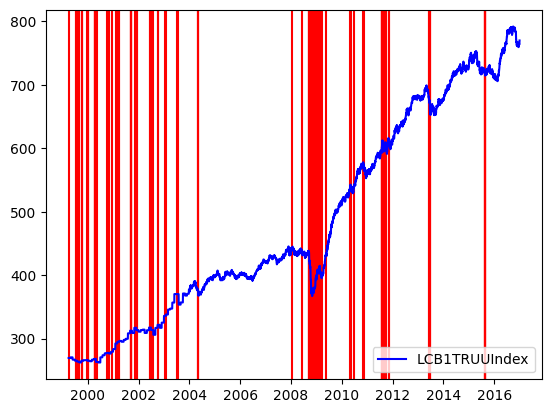

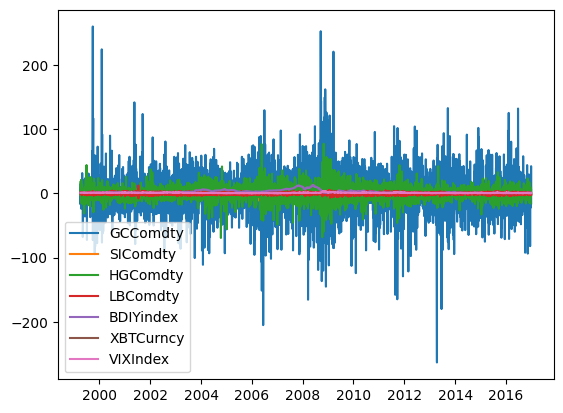

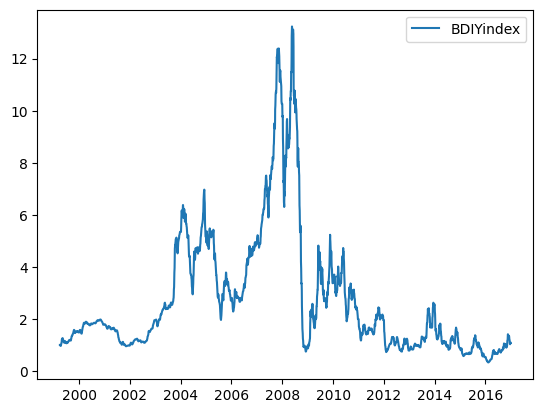

In [18]:
v.show_price_with_decline_label(ds, "LCB1TRUUIndex")
v.show_multi_indexes(
    ds,
    [
        "GCComdty",
        "SIComdty",
        "HGComdty",
        "LBComdty",
        "BDIYindex",
        "XBTCurncy",
        "VIXIndex",
    ],
)
v.show_multi_indexes(
    ds,
    [
        "BDIYindex",
    ],
)

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from ipywidgets import interact, Select,SelectMultiple

import matplotlib.pyplot as plt
%matplotlib inline

def show_plot(col1):
    plt.figure(figsize=(4.5,4.5))
    for c in col1:
        plt.plot( ds.trdf['Dates'],ds.trdf[c],label=c)
    plt.xlabel('Date')
    plt.ylabel('')
    plt.legend()
    plt.show()

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

w1 = SelectMultiple(description='Y軸:', options=ds.trdf.columns, rows=8,)
interact(show_plot, col1=w1)


interactive(children=(SelectMultiple(description='Y軸:', options=('Dates', 'ESIndex', 'TYComdty', 'TargetPortDa…

<function __main__.show_plot(col1)>

,COComdty,GCComdty,SIComdty,HGComdty
COComdty,1.000000,0.207465,0.255123,0.326046
GCComdty,0.207465,1.000000,0.768538,0.329958
SIComdty,0.255123,0.768538,1.000000,0.431806
HGComdty,0.326046,0.329958,0.431806,1.000000


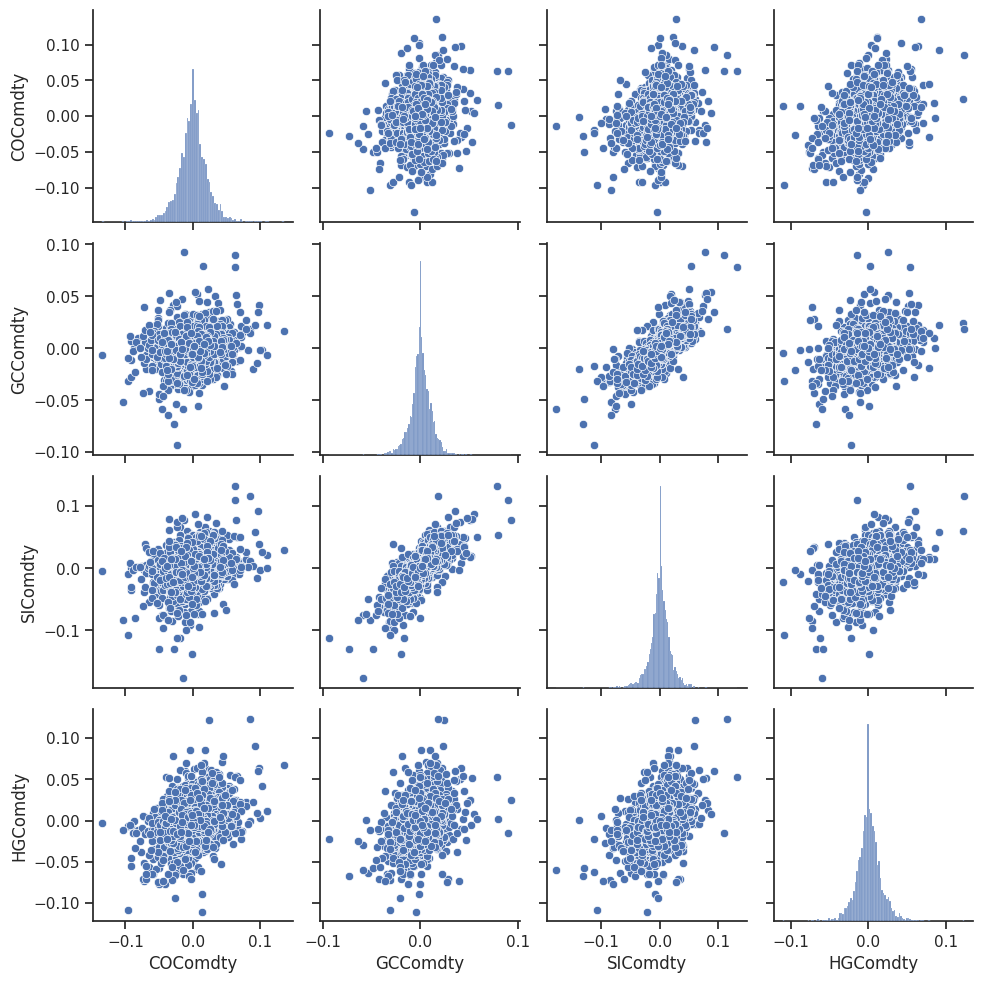

In [29]:
import seaborn as sns
sns.set(style="ticks")

tdf=ds.trdf[["COComdty", "GCComdty", "SIComdty", "HGComdty"]]


# pairplot関数で散布図を作成
sns.pairplot(tdf)
tdf.corr()